## **Abstract:**


This study focuses on predicting house prices using a comprehensive dataset that encompasses various features crucial for understanding housing market dynamics. The dataset comprises 13 columns, including both numerical and categorical variables, offering insights into the characteristics and amenities of residential properties.

Numerical features such as 'Area', 'Bedrooms', 'Bathrooms', 'Stories', and 'Parking' provide quantitative information about the size and capacity of the houses, which are fundamental factors influencing property prices. Additionally, categorical features like 'Mainroad', 'Guestroom', 'Basement', 'Hot water heating', 'Airconditioning', 'Prefarea', and 'Furnishing status' offer qualitative data regarding the amenities and attributes of the houses, contributing to the overall perceived value.

The target variable, 'Price', serves as the focal point for predicting house prices accurately, guiding real estate stakeholders in making informed decisions related to property transactions and investments.

The methodology employed in this study involves the application of various machine learning models to the dataset to predict house prices effectively. Initially, a linear regression model is fitted to interpret regression coefficients, elucidating the direct impact of predictors on house prices in a quantifiable manner. Subsequently, tree-based models are explored to understand decision-making processes by interpreting decision nodes, highlighting the significance of specific features in predicting house prices.

Furthermore, AutoML techniques are leveraged to automate the process of model selection, facilitating the comparison of different models and configurations to identify the most optimal one without manual intervention. Finally, SHAP (SHapley Additive exPlanations) analysis is applied to the models from previous steps, providing a detailed breakdown of each feature's contribution to individual house price predictions. By interpreting SHAP values, insights into the drivers of house price predictions are obtained, enabling a comparison of model interpretability across different methodologies.

Throughout this study, there is a strong emphasis on not only building predictive models but also on deeply understanding them. This underscores the importance of transparency and ethical considerations in AI, ensuring that models are interpretable, fair, and accountable in the context of house price prediction.

In [1]:
# installing dependencies for data profiling
!pip install eli5
!pip install scikit-learn matplotlib
!pip install fitter

In [2]:
# installing dependencies for auto ml
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install xgboost

# for outlier preprocessing
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00


In [3]:
# installing dependencies for h20
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.2 MB/s eta 0:00:00


In [5]:
#installing dependencies for shap analysis
!pip install --upgrade shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

# to normalize dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

# regularization
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to implement automl
import h2o
from h2o.automl import H2OAutoML

# for shap analysis
import shap

##**Assignment 1**

The assignment revolves around conducting data cleaning and feature selection for a housing price prediction task using a given dataset. This involves assessing the data types, identifying missing values, understanding the distributions of numeric variables, determining useful independent variables for predicting housing prices through multiple methods, analyzing missing data in independent variables, comparing training and test sets, assessing predictor variable independence, identifying the most important predictor variables, checking the sensibility of predictor variable ranges and distributions, handling outliers, and evaluating the performance of different imputation methods for missing data. Additionally, for categorical data, accuracy and confusion matrices are calculated. In essence, the goal is to ensure the housing price prediction dataset is appropriately prepared for predictive modeling by addressing data quality issues and selecting relevant features.

In [7]:
#reading data
data = pd.read_csv("https://raw.githubusercontent.com/riyaneu/Housing-Prices-Prediction/main/Housing.csv")

In [8]:
# Viewing data in the file
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


What are the data types?

In [9]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Transform categorical data using One Hot Encoding

In [12]:
# Perform one-hot encoding for categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data = pd.get_dummies(data, columns=categorical_cols)

print(data.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0             1             1              0  ...             0   
1             1             1              0  ...             0   
2             1             1              0  ...             1   
3             1             1              0  ...             1   
4             1             0              1  ...             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0                   0   
1                   1     

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [14]:
# checking if the any data is missing
data.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_no                        0
mainroad_yes                       0
guestroom_no                       0
guestroom_yes                      0
basement_no                        0
basement_yes                       0
hotwaterheating_no                 0
hotwaterheating_yes                0
airconditioning_no                 0
airconditioning_yes                0
prefarea_no                        0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

There are no missing values in this dataset

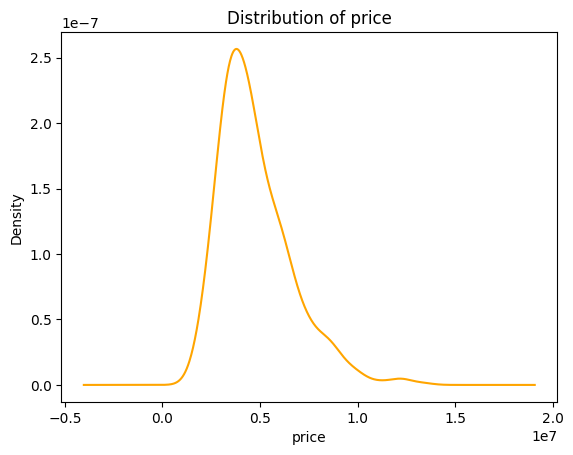

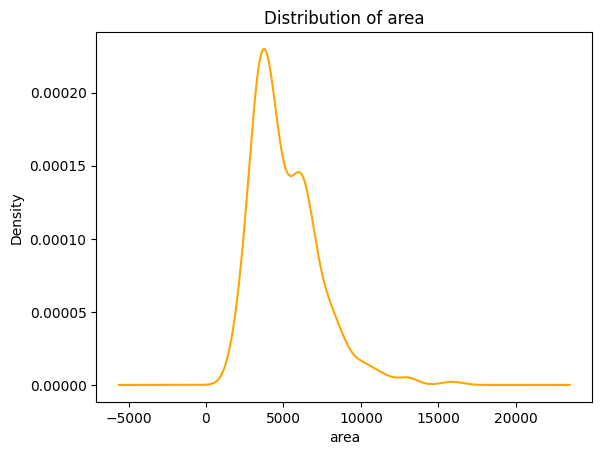

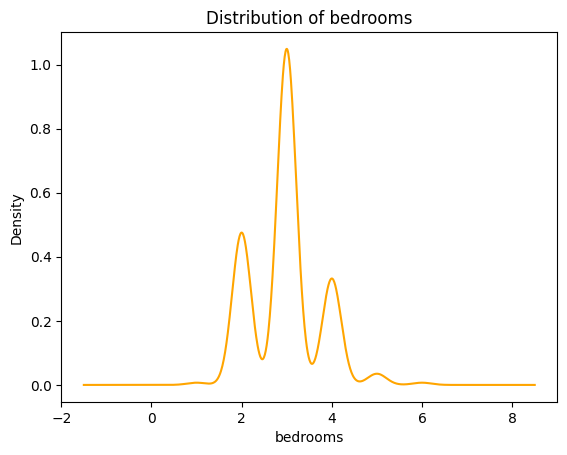

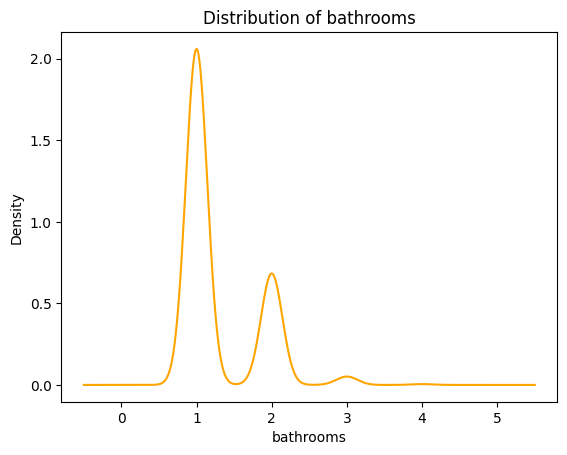

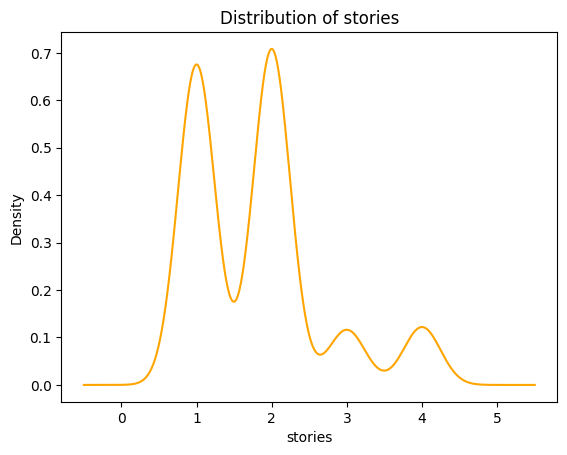

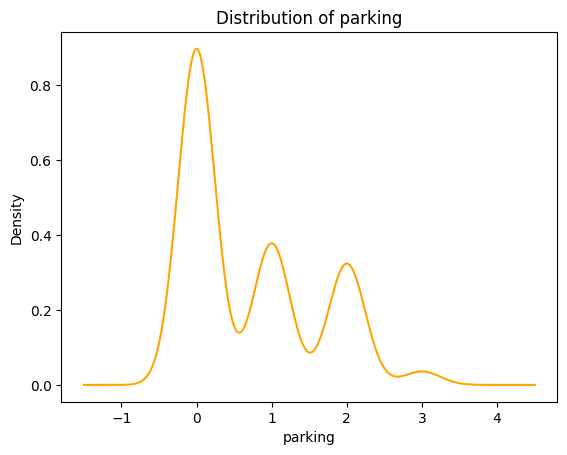

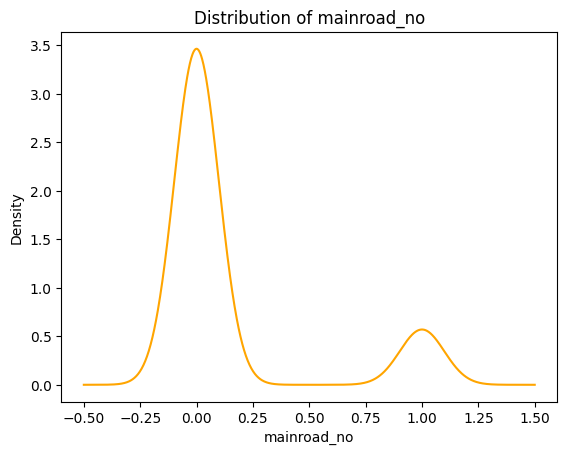

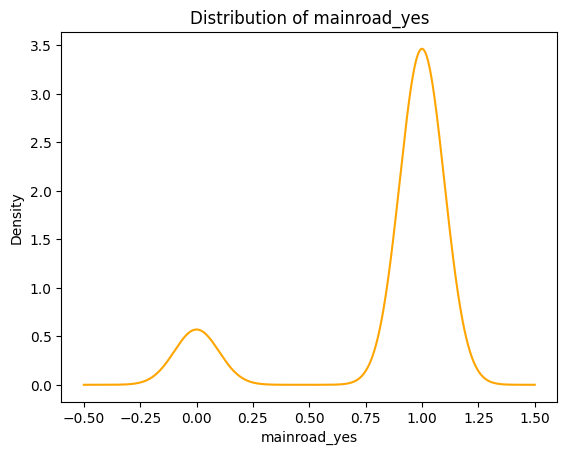

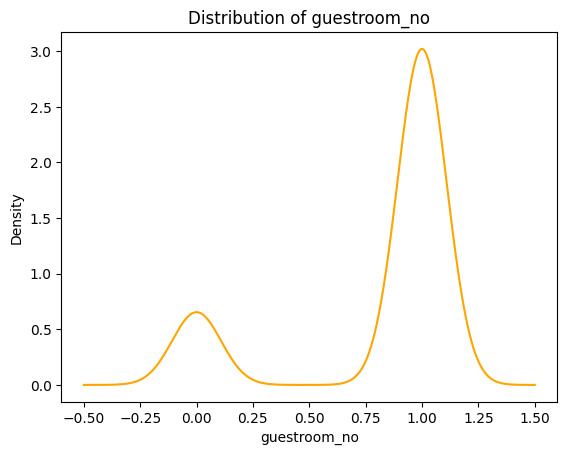

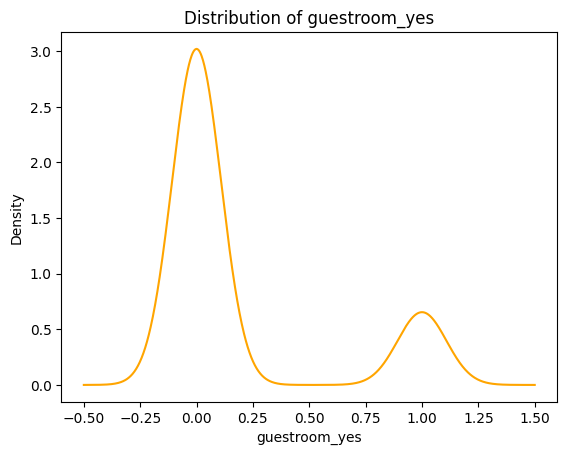

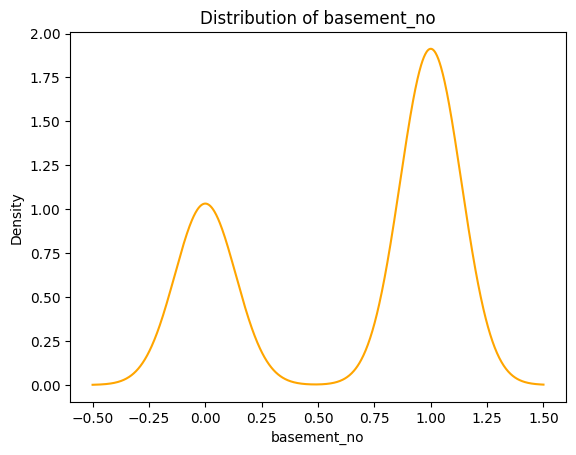

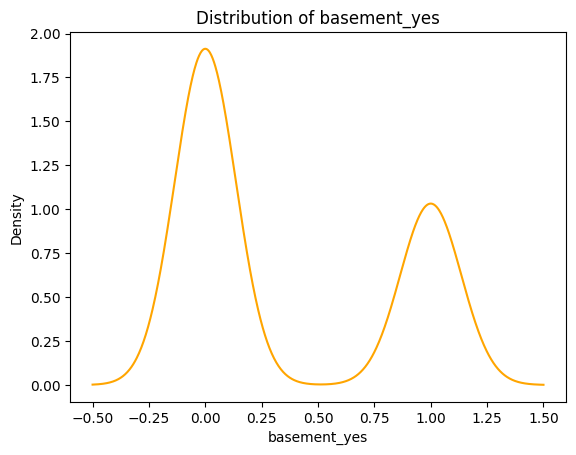

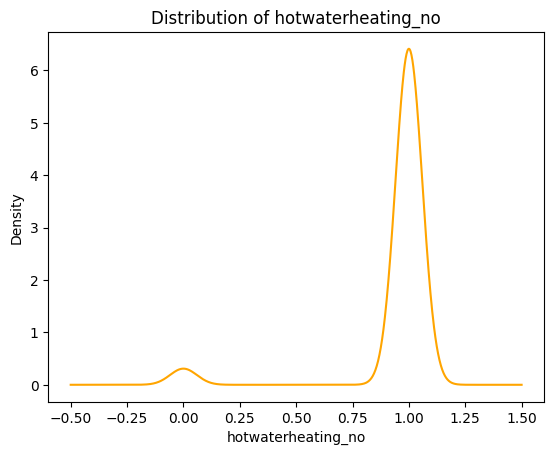

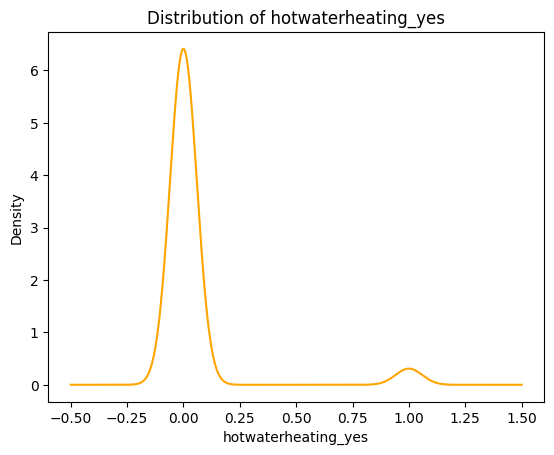

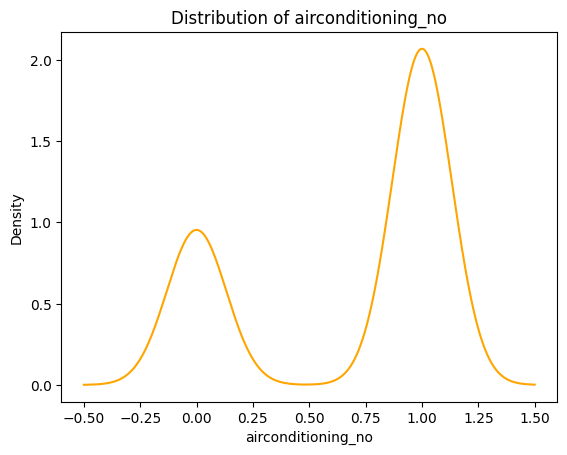

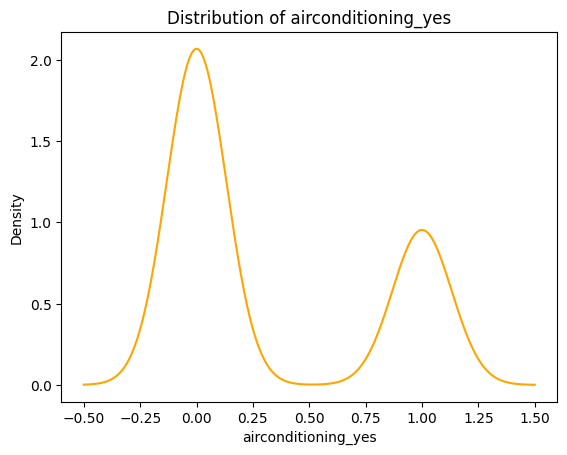

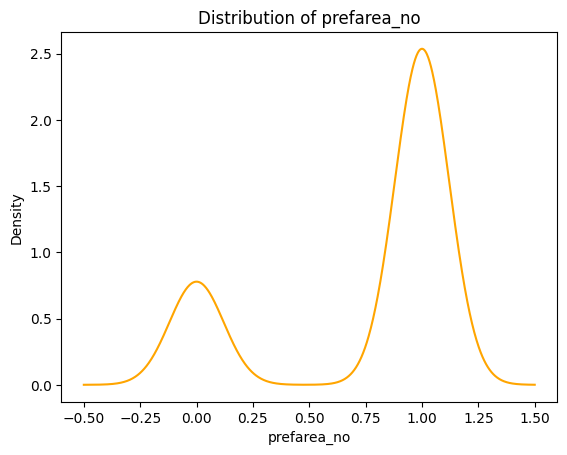

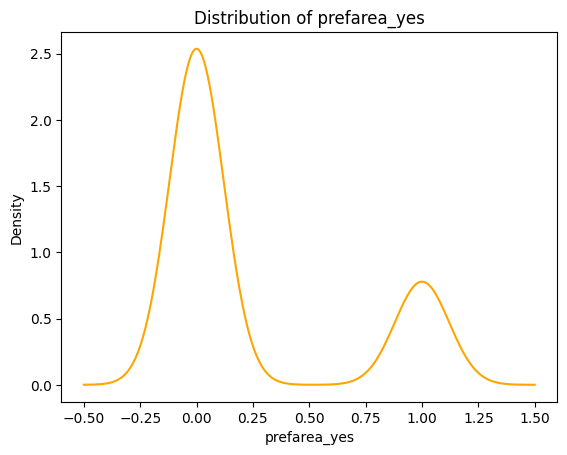

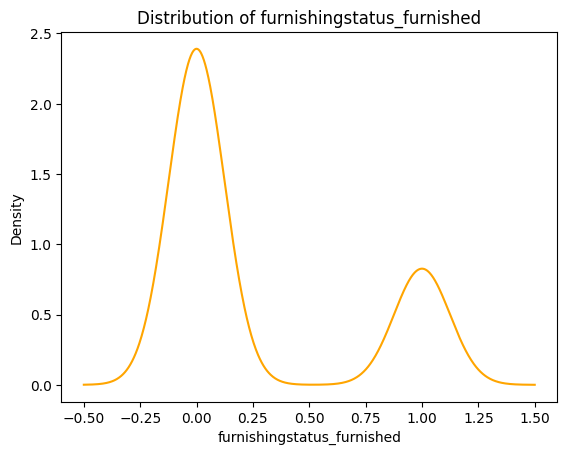

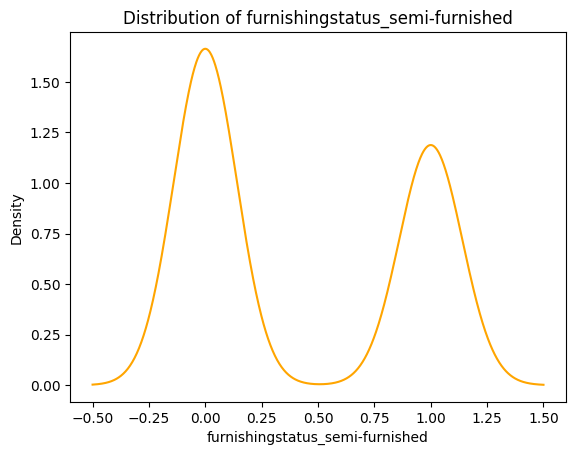

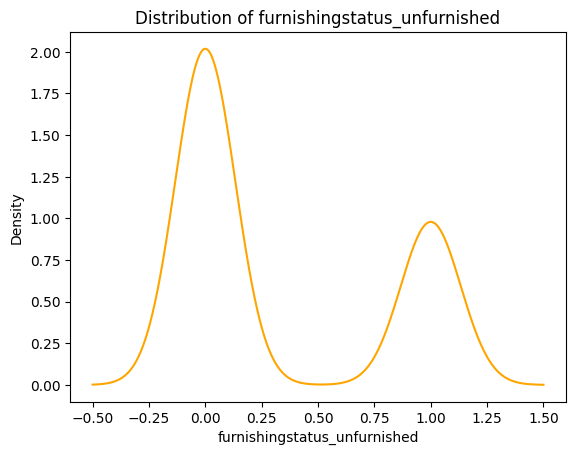

In [15]:
# Plotting the distribution of independent variables
for column in data.columns:
    # Check if the column is numeric (excluding 'object' dtype)
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column].plot.density(color="Orange")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.show()

In [16]:
#Range of each column
data.max() - data.min()

price                              11550000
area                                  14550
bedrooms                                  5
bathrooms                                 3
stories                                   3
parking                                   3
mainroad_no                               1
mainroad_yes                              1
guestroom_no                              1
guestroom_yes                             1
basement_no                               1
basement_yes                              1
hotwaterheating_no                        1
hotwaterheating_yes                       1
airconditioning_no                        1
airconditioning_yes                       1
prefarea_no                               1
prefarea_yes                              1
furnishingstatus_furnished                1
furnishingstatus_semi-furnished           1
furnishingstatus_unfurnished              1
dtype: int64

The range of "price" and "area" variables is high, this implies high variablity in their distribution.

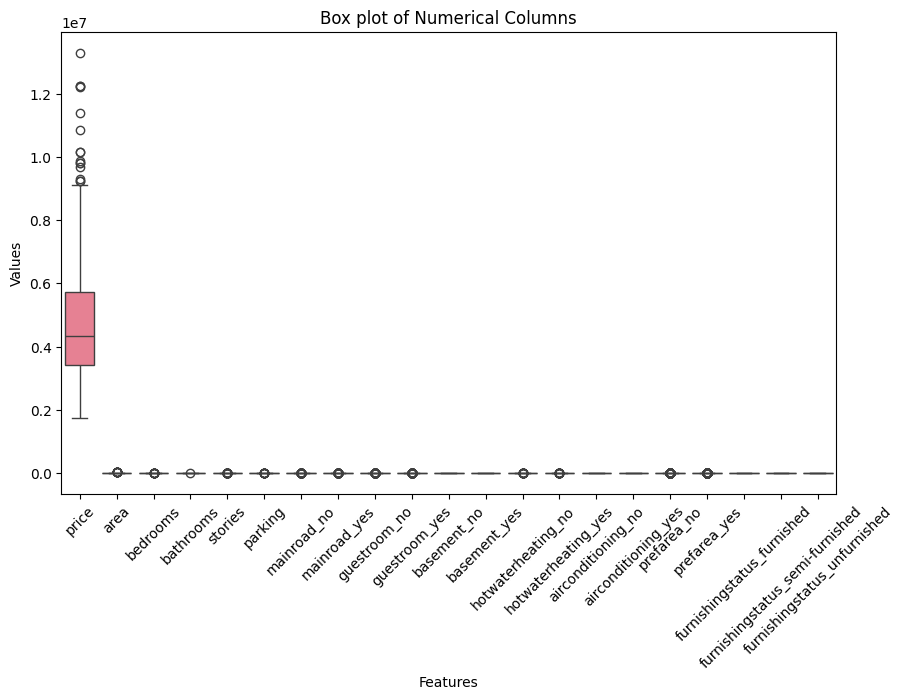

In [17]:
# Plot box plots for numerical columns using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box plot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Extract features (excluding 'price')
features = data.drop('price', axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Concatenate 'price' column back to the scaled DataFrame if needed
scaled_data['price'] = data['price']

# Display the normalized DataFrame
print(scaled_data.head())

       area  bedrooms  bathrooms   stories   parking  mainroad_no  \
0  1.046726  1.403419   1.421812  1.378217  1.517692    -0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409    -0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692    -0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409    -0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692    -0.405623   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  ...  \
0      0.405623      0.465315      -0.465315     0.734539  ...   
1      0.405623      0.465315      -0.465315     0.734539  ...   
2      0.405623      0.465315      -0.465315    -1.361397  ...   
3      0.405623      0.465315      -0.465315    -1.361397  ...   
4      0.405623     -2.149083       2.149083    -1.361397  ...   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0            0.219265            -0.219265           -1.472618   
1            0.219265            -0.219265           -1.

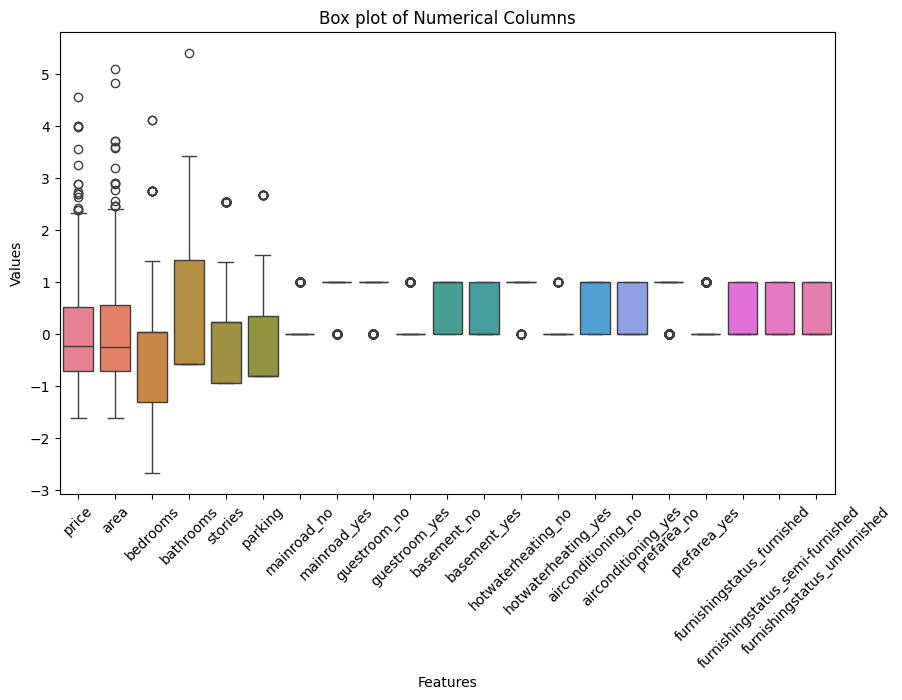

In [21]:
# Plot box plots for numerical columns using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box plot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We are performing feature selection using the following 3 methods:

1. Mutual Information:

In [25]:
from sklearn.feature_selection import mutual_info_classif

# Apply SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k='all')
fit = k_best.fit(X_encoded, y_encoded)

# Get selected features
selected_features = fit.transform(X_encoded)

# Print the scores of features
print("Feature scores:", fit.scores_)

Feature scores: [0.         0.         0.00285574 0.00591477 0.00093463 0.01345692
 0.04541779 0.01533861 0.         0.         0.03132722 0.        ]


In [28]:
from sklearn.feature_selection import mutual_info_classif

# Apply SelectKBest with mutual information scoring function
k_best_mi = SelectKBest(score_func=mutual_info_classif, k='all')
fit_mi = k_best_mi.fit(X_encoded, y_encoded)

# Get the scores and feature names
scores_mi = fit_mi.scores_
feature_names_mi = X_encoded.columns

# Create a DataFrame to display the scores for each feature
feature_scores_mi = pd.DataFrame({'Feature': feature_names_mi, 'Score': scores_mi})
feature_scores_mi = feature_scores_mi.sort_values(by='Score', ascending=False)

# Display the scores
print("Feature Scores (Mutual Information):")
print(feature_scores_mi)


Feature Scores (Mutual Information):
               Feature     Score
2            bathrooms  0.039601
5          mainroad_no  0.037887
8        guestroom_yes  0.034481
7         guestroom_no  0.011726
1             bedrooms  0.010126
11  hotwaterheating_no  0.007408
4              parking  0.003647
0                 area  0.000000
3              stories  0.000000
6         mainroad_yes  0.000000
9          basement_no  0.000000
10        basement_yes  0.000000


2. Feature Importance using Random Forest Regressor:

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(5).index

In [30]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop("price", axis=1)  # Assuming "target_variable" is your target column
y = data["price"]

# Instantiate the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Display feature importances in descending order
print(feature_importances.sort_values(ascending=False))

area                               0.461883
bathrooms                          0.154348
parking                            0.058928
stories                            0.053907
bedrooms                           0.041586
furnishingstatus_unfurnished       0.037451
airconditioning_no                 0.028078
airconditioning_yes                0.027839
prefarea_yes                       0.019115
basement_yes                       0.017157
prefarea_no                        0.016213
basement_no                        0.014653
furnishingstatus_furnished         0.012543
furnishingstatus_semi-furnished    0.010401
guestroom_yes                      0.009760
guestroom_no                       0.009102
hotwaterheating_yes                0.008769
hotwaterheating_no                 0.008515
mainroad_yes                       0.005086
mainroad_no                        0.004664
dtype: float64


3. Recursive Feature Elimination(RFE):

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix and y is your target variable
X = data.drop("price", axis=1)
y = data["price"]

# Instantiate the linear regression model
model = LinearRegression()

# Specify the number of features to select (adjust as needed)
n_features_to_select = 5

# Create the RFE model
rfe = RFE(model, n_features_to_select=n_features_to_select)

# Fit the RFE model to your data
fit = rfe.fit(X, y)

# Print the ranking of features (1 indicates selected)
print("Feature Ranking:")
print(fit.ranking_)

# Get the selected features
selected_features = X.columns[fit.support_]

# Display the selected features
print("\nSelected Features:")
print(selected_features)

Feature Ranking:
[ 1 16  1  7 10 11  3 13  9  6 12  1  4  1  2  8  1 14 15  5]

Selected Features:
Index(['area', 'bathrooms', 'hotwaterheating_no', 'airconditioning_no',
       'prefarea_yes'],
      dtype='object')


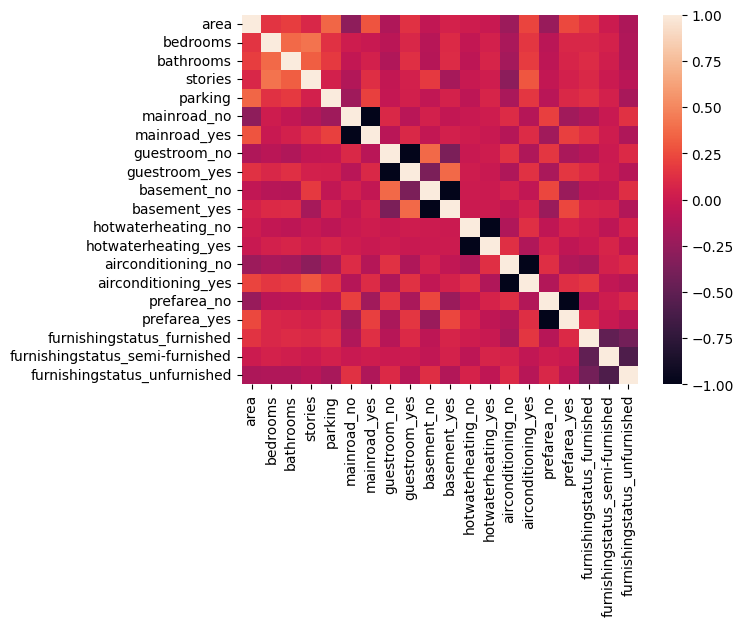

In [32]:
X = data.drop("price", axis=1)
X.corr()
sns.heatmap(X.corr());

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [34]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[-9.50955643e-01  4.99207160e-02 -6.74673966e-01 -1.13041182e+00
  1.28781266e+00 -4.17333822e-01  4.63706519e-01  3.42787793e-01
  2.90391363e+00  1.79273408e-01 -8.09027694e-01  9.54912066e-04
 -5.58589408e-01  1.66848585e+00 -3.63564816e-01  1.24770052e+00
  1.03593549e+00  1.18851486e+00 -4.56993292e-02 -9.11838009e-01
 -1.07989849e-01  7.70045010e-01 -6.25065255e-01 -9.89126318e-02
 -2.38865366e-02  1.51830135e+00 -5.16849993e-01 -6.05038997e-01
 -2.97176231e-01 -7.96424423e-01 -1.57880848e-01  1.10344431e+00
  1.22832733e+00  3.85372876e-01 -1.13075969e+00 -1.43689106e+00
 -1.27863794e-01 -4.77369220e-01 -5.76499743e-01 -1.08652221e+00
  1.13862353e+00  1.13389016e+00  4.08745088e-01  8.82824422e-01
 -1.07204002e+00  7.22461738e-02 -1.01024318e+00 -6.15823072e-02
 -5.29781668e-01 -5.72498328e-01  1.24843750e+00 -1.21996161e+00
  1.11529714e+00 -4.28139481e-01 -1.10351375e+00  1.28995135e-01
 -8.24652524e-01 -8.94730624e-01 -1.16799977e+00  4.92984634e-01
  9.25710881e-01  1.01966

In [35]:
# Shape of Training and Testing Data
print("Shape of Training data is = " + str(X_train.shape))
print("Shape of Test data is = " + str(X_test.shape))

Shape of Training data is = (408, 20)
Shape of Test data is = (137, 20)


In [36]:
train_unique_values = set(y_train.unique())
test_unique_values = set(y_test.unique())

if train_unique_values == test_unique_values:
    print("Training and test sets have the same unique values.")
else:
    print("Training and test sets have different unique values.")

Training and test sets have different unique values.


In [37]:
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

mean squared error: 0.3659504774166733 

r2_score :  0.6934430384264998


In [41]:
pip install datasist

In [43]:
from datasist.structdata import detect_outliers

index = detect_outliers(
    data,
    0,
    [
    "price",
    "area",
    "bedrooms",
    "bathrooms",
    "stories",
    "parking",
    "mainroad_no",
    "mainroad_yes",
    "guestroom_no",
    "guestroom_yes",
    "basement_no",
    "basement_yes",
    "hotwaterheating_no",
    "hotwaterheating_yes",
    "airconditioning_no",
    "airconditioning_yes",
    "prefarea_no",
    "prefarea_yes",
    "furnishingstatus_furnished",
    "furnishingstatus_semi-furnished",
    "furnishingstatus_unfurnished"
],
)
len(index)

310

In [44]:
for col in data[
    [
        "price",
    "area",
    "bedrooms",
    "bathrooms",
    "stories",
    "parking",
    "mainroad_no",
    "mainroad_yes",
    "guestroom_no",
    "guestroom_yes",
    "basement_no",
    "basement_yes",
    "hotwaterheating_no",
    "hotwaterheating_yes",
    "airconditioning_no",
    "airconditioning_yes",
    "prefarea_no",
    "prefarea_yes",
    "furnishingstatus_furnished",
    "furnishingstatus_semi-furnished",
    "furnishingstatus_unfurnished"
    ]
]:
    outliers_indices = detect_outliers(data, 0, [col])
    col_median = data[col].median()
    data[col].iloc[outliers_indices] = col_median

<ipython-input-44-0adea06f5672>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].iloc[outliers_indices] = col_median
<ipython-input-44-0adea06f5672>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].iloc[outliers_indices] = col_median
<ipython-input-44-0adea06f5672>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].iloc[outliers_indices] = col_median
<ipython-input-44-0adea06f5672>:28: SettingWithCopyWarn

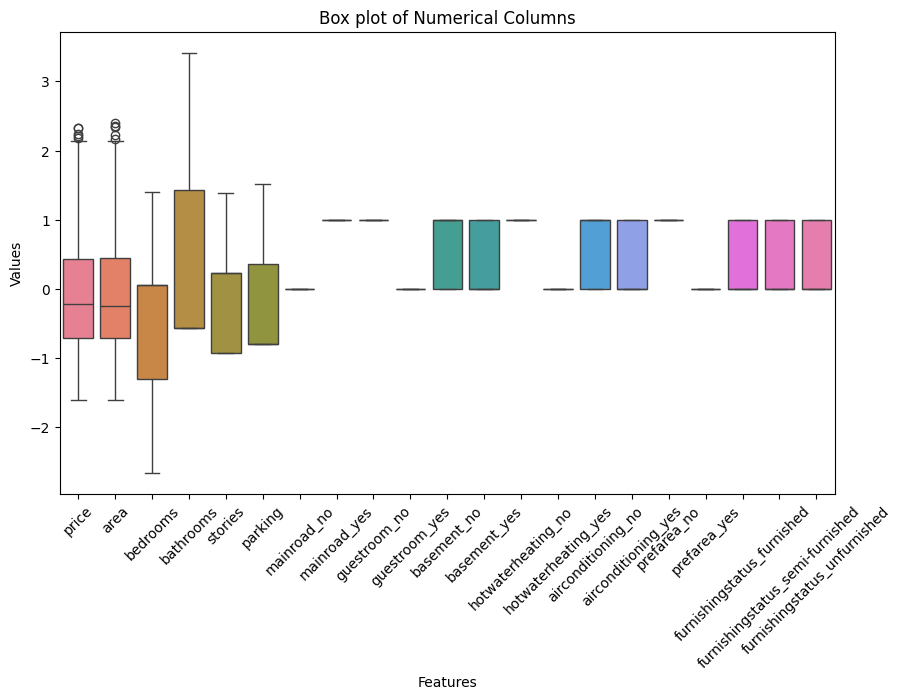

In [47]:
# Plot box plots for numerical columns using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box plot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [45]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 1.79872279 -0.63353904 -0.45699596  0.2328758  -0.99355349  1.10195954
 -0.01111409 -0.7903513  -0.01995337  0.67841116 -1.14622575  0.71826878
  0.76819688 -0.61419174 -0.69475051 -0.79586    -0.87392051 -0.55840924
 -0.09106093 -0.96392471  0.86209014 -0.07129612 -0.16707948 -0.05700015
  0.70950505  0.56664515  1.11200089 -0.09566359 -0.09538318 -0.59908709
  0.07373925  0.96864156 -0.18614437  0.35713447 -0.43256497  0.76620482
 -0.3030657  -0.36654119  0.62563942  0.18145229  0.19285212  0.11705906
 -0.23011292 -0.46866281 -0.00385705 -0.06205093 -0.07217629  0.04761289
 -0.76582555 -0.14247933 -0.82933761  0.21984102 -0.57210397  0.40030178
  0.33501305 -0.21901911 -0.02583618  0.32027289 -0.08950807  0.40004446
 -0.07034043 -0.04723027  0.82307488  0.36729896 -0.68565645  0.04375019
 -0.24827175 -1.09837256 -0.44788423 -0.5111645   1.32568656 -0.29290013
 -0.13468719  0.36788868 -0.0987973   0.10725718 -0.41660383  0.98751052
 -0.15218918 -0.47029942 -0.78285657 -0.42859513 -0

In [46]:
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

mean squared error: 0.41113487883204225 

r2_score :  0.4213168132204498


It is observed that the error rate in the prediction of prices increased when outliers are removed thus decreasing the accuracy of pricing prediction. In conclusion, removing outliers is not beneficial in this case.

Removing 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [48]:
df_imputation= data[['price']]
df_imputation['1_percent'] = df_imputation[['price']]
df_imputation['5_percent'] = df_imputation[['price']]
df_imputation['10_percent'] = df_imputation[['price']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
df_imputation.head()

<ipython-input-48-f7ae06fe6ec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['price']]
<ipython-input-48-f7ae06fe6ec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['price']]
<ipython-input-48-f7ae06fe6ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,price,1_percent,5_percent,10_percent
0,-0.228353,-0.228353,-0.228353,-0.228353
1,-0.228353,-0.228353,-0.228353,-0.228353
2,-0.228353,-0.228353,-0.228353,-0.228353
3,-0.228353,-0.228353,-0.228353,-0.228353
4,-0.228353,-0.228353,-0.228353,-0.228353


In [49]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [50]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price            price              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [51]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [52]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

<ipython-input-51-b0d10bbcf223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [53]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price            price         0.000000
1_percent    1_percent         0.917431
5_percent    5_percent         4.954128
10_percent  10_percent         9.908257


In [54]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [55]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Length of number_1_idx is 5 and it contains 0.9174311926605505% of total data in column | Total rows: 545
Length of number_5_idx is 27 and it contains 4.954128440366973% of total data in column | Total rows: 545
Length of number_10_idx is 54 and it contains 9.908256880733946% of total data in column | Total rows: 545


Imputing values for missing values

**Method 1: KNN Imputation**

In [56]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [57]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,-0.228353,-0.228353,-0.228353
1,-0.228353,-0.228353,-0.228353
2,-0.228353,-0.228353,-0.228353
3,-0.228353,-0.228353,-0.228353
4,-0.228353,-0.228353,-0.228353


In [58]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [59]:
price = data["price"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Price","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Price         0.709932
1_Percent     0.709953
5_Percent     0.709997
10_Percent    0.708912
dtype: float64

**Method 2: Mean based Imputation with Simpleimputer**

In [68]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [69]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [70]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [71]:
price = data["price"]
combined_mean = pd.concat([price,imputed_mean])
combined_mean.mean()

0            -0.092705
1_percent    -0.095119
5_percent    -0.096236
10_percent   -0.094654
dtype: float64

**Method 3: Imputation Using Multivariate Imputation by Chained Equation (MICE)**

In [76]:
!pip install impyute --upgrade

In [77]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         0.917431
5_percent    5_percent         4.954128
10_percent  10_percent         9.908257


In [83]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Assuming df_imputation_mice is your DataFrame with missing values
# For demonstration purposes, let's create a sample DataFrame
data = {
    'price': [100000, 150000, 200000, None, 180000],
    'area': [1200, 1500, 1800, None, 1600],
    'bedrooms': [2, 3, None, 4, 3],
    'bathrooms': [1, None, 2, 2, 1]
}

df_imputation_mice = pd.DataFrame(data)

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit the imputer model on your data and transform it to impute missing values
imputed_data = imputer.fit_transform(df_imputation_mice)

# Convert the imputed array back to a DataFrame with the original column names
df_imputed = pd.DataFrame(imputed_data, columns=df_imputation_mice.columns)

# Show the imputed DataFrame
print(df_imputed)


           price         area  bedrooms  bathrooms
0  100000.000000  1200.000000  2.000000   1.000000
1  150000.000000  1500.000000  3.000000   1.528602
2  200000.000000  1800.000000  3.905231   2.000000
3  157499.142232  1524.995161  4.000000   2.000000
4  180000.000000  1600.000000  3.000000   1.000000


 I explored the dataset using various techniques, including handling missing data, assessing variable distributions, and identifying important predictors. Additionally, I evaluated the impact of outliers and data manipulation on model performance. Through this process, I gained valuable insights into data exploration techniques and their significance in building predictive models.

## **Assignment 2**

In this assignment, an AutoML library like H2O.ai is utilized for predictive modeling and interpretation on a given dataset. The process involves identifying significant relationships for chosen algorithms, constructing multivariate models, and evaluating their significance, assumptions, and multicollinearity. Predictor variable independence is assessed, and significant variables are prioritized while insignificant ones are excluded. Model coherence and regularization impact are examined, highlighting significant independent variables and important hyperparameters. Through these steps, robust predictive models are built, providing insights into the dataset's patterns and relationships.

In [104]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 37 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_o5m0sx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [105]:
min_mem_size=6
run_time=222

In [106]:
import psutil
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [107]:
import random

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25774..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6tb2tmh7
  JVM stdout: /tmp/tmp6tb2tmh7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6tb2tmh7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25774
Connecting to H2O server at http://127.0.0.1:25774 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_28jr14
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [108]:
#Reading the dataset
df = h2o.import_file("https://raw.githubusercontent.com/riyaneu/Housing-Prices-Prediction/main/Housing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [109]:
numeric_cols=[]
cat_cols=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
for col in cat_cols:
    df[col] = df[col].asnumeric()
df

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1.33e+07,7420,4,2,3,1,0,0,0,1,2,1,0
1.225e+07,8960,4,4,4,1,0,0,0,1,3,0,0
1.225e+07,9960,3,2,2,1,0,1,0,0,2,1,1
1.2215e+07,7500,4,2,2,1,0,1,0,1,3,1,0
1.141e+07,7420,4,1,2,1,1,1,0,1,2,0,0
1.085e+07,7500,3,3,1,1,0,1,0,1,2,1,1
1.015e+07,8580,4,3,4,1,0,0,0,1,2,1,1
1.015e+07,16200,5,3,2,1,0,0,0,0,0,0,2
9.87e+06,8100,4,1,2,1,1,1,0,1,2,1,0
9.8e+06,5750,3,2,4,1,1,0,0,1,1,1,2


In [112]:
df.describe()

Rows:545
Cols:13

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
type,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1750000.0,1650.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4766729.247706423,5150.541284403667,2.9651376146789,1.286238532110092,1.805504587155964,0.8587155963302753,0.1779816513761468,0.3504587155963303,0.045871559633027525,0.3155963302752294,0.6935779816513763,0.23486238532110093,1.0697247706422017
maxs,13300000.0,16200.0,6.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0
sigma,1870439.6156573943,2170.1410225088025,0.7380638605685749,0.5024696160532152,0.8674924629255262,0.3486346818552864,0.3828486968277535,0.47755193997058665,0.20939869711891676,0.46517989719162867,0.8615857504605414,0.42430222710285986,0.7613726703968293
zeros,0,0,0,0,0,77,448,354,520,373,299,417,140
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0


In [115]:
# Reading file using pandas
dff = pd.read_csv('https://raw.githubusercontent.com/riyaneu/Housing-Prices-Prediction/main/Housing.csv')

In [116]:
numeric_cols=[]
cat_cols=[]
for column in dff.columns:
    if pd.api.types.is_numeric_dtype(dff[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [117]:
from sklearn.preprocessing import LabelEncoder
lec=LabelEncoder()

In [118]:
for col in cat_cols:
    dff[col]=lec.fit_transform(dff[col])
dff

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [119]:
dff.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

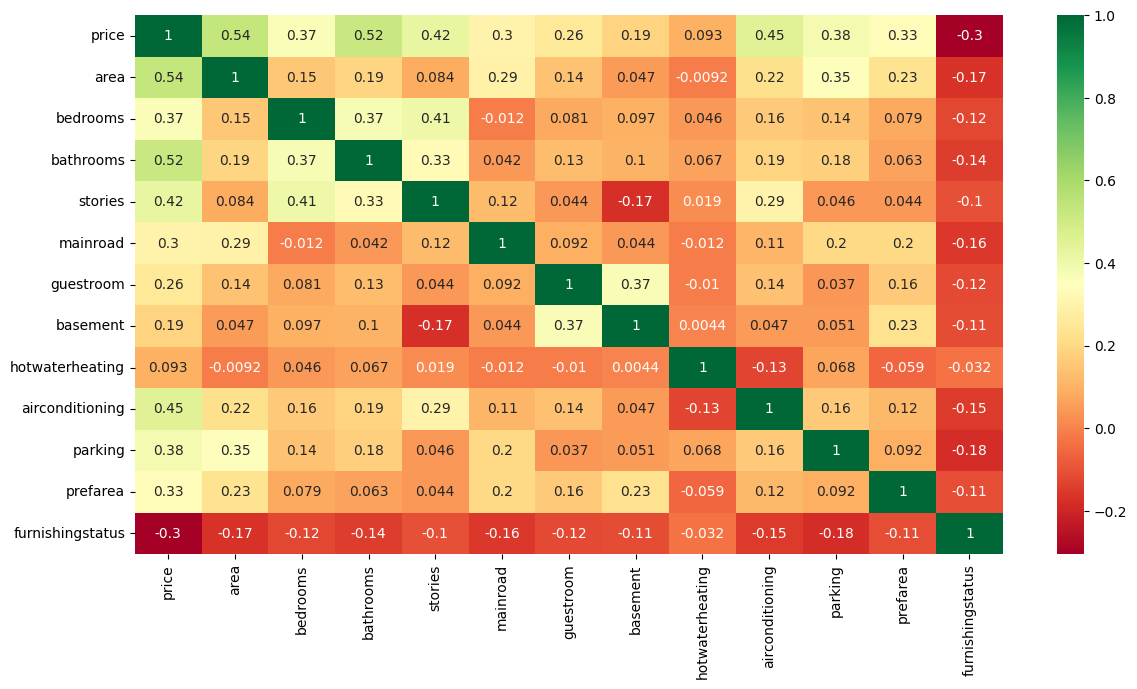

In [120]:
plt.figure(figsize=(14,7))
sns.heatmap(dff.corr(), annot=True, cmap='RdYlGn')

In [121]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['price'], dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              997.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        02:30:19   Log-Likelihood:                         -8333.1
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     533   BIC:                                  1.674e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area               246.2315     23.564     10.449      0.000     199.942     292.521
bedrooms           1.35e+05   6.06e+04      2.227      0.026    1.59e+04    2.54e+05
bathrooms         9.962e+05   1.02e+05      9.793      0.000    7.96e+05     1.2e+06
stories           4.513e+05   6.42e+04      7.032      0.000    3.25e+05    5.77e+05
mainroad          4.462e+05   1.29e+05      3.449      0.001    1.92e+05       7e+05
guestroom          2.96e+05   1.32e+05      2.247      0.025    3.72e+04    5.55e+05
basement          3.621e+05    1.1e+05      3.299      0.001    1.46e+05    5.78e+05
hotwaterheating   8.737e+05   2.23e+05      3.916      0.000    4.35e+05    1.31e+06
airconditioning   8.516e+05   1.08e+05      7.876      0.000    6.39e+05    1.06e+06
parking            2.78e+05   5.84e+04      4.762      0.000    1.63e+05    3.93e+05
prefarea          6.437e+05   1.15e+05      5.576      0.000    4.17e+05     8.7e+05
furnishingstatus -2.026e+05   5.68e+04     -3.568      0.000   -3.14e+05    -9.1e+04
==============================================================================
Omnibus:                       92.287   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.741
Skew:                           0.852   Prob(JB):                     1.44e-52
Kurtosis:                       5.759   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **VIF (Variance Inflation Factor)**

In [122]:
dfpd = dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].dropna() #subset the dataframe

In [123]:
# the independent variables set
X = dff[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature        VIF
0               area   8.270130
1           bedrooms  16.368165
2          bathrooms   9.408363
3            stories   7.880723
4           mainroad   6.852485
5          guestroom   1.472838
6           basement   2.013876
7    hotwaterheating   1.089167
8    airconditioning   1.759717
9            parking   1.985880
10          prefarea   1.492621
11  furnishingstatus   2.648467


In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define the RandomForestRegressor
rf_model = RandomForestRegressor()

In [127]:
# Specify the hyperparameters and their possible values for the RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=5,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    random_state=1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=1, scoring='neg_mean_squared_error')

In [128]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Root Mean Squared Error (RMSE): 0.5663318422653794


In [129]:
dff = h2o.H2OFrame(dff)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [131]:
train, test = dff.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [132]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [133]:
drift_data["is_train"].table()

is_train,Count
0,130
1,415


In [134]:
x = list(set(train.col_names) - set(["price"]))

In [135]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="price", training_frame=train)

AutoML progress: |
02:33:04.478: _train param, Dropping bad and constant columns: [is_train]

█
02:33:11.373: _train param, Dropping bad and constant columns: [is_train]

█
02:33:13.112: _train param, Dropping bad and constant columns: [is_train]

█
02:33:16.268: _train param, Dropping bad and constant columns: [is_train]

█
02:33:19.45: _train param, Dropping bad and constant columns: [is_train]

██
02:33:22.596: _train param, Dropping bad and constant columns: [is_train]


02:33:23.705: _train param, Dropping bad and constant columns: [is_train]

█
02:33:24.732: _train param, Dropping bad and constant columns: [is_train]

█
02:33:26.263: _train param, Dropping bad and constant columns: [is_train]

███
02:33:29.899: _train param, Dropping bad and constant columns: [is_train]

█
02:33:33.366: _train param, Dropping unused columns: [is_train]

███████████████████████████████████████████████████| (done) 100%

02:33:34.509: _train param, Dropping unused columns: [is_train]



Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240403_23304


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 37                          12521                  6            8            7.75676       15            27            22.1622

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 679876728550.8033
RMSE: 824546.3774408347
MAE: 581657.3867469879
RMSLE: 0.16634498686383664
Mean Residual Deviance: 679876728550.8033

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1368624756443.0667
RMSE: 1169882.3686350123
MAE: 817761.86020515
RMSLE: 0.2279402907412875
Mean Residual Deviance: 1368624756443.0667

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     827646       112393       827318        988666        772285        864395        685568
mean_residual_deviance  1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
mse                     1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
r2                      0.587428     0.111677     0.653452      0.449928      0.594739      0.508809      0.730211
residual_deviance       1.40254e+12  3.99113e+11  1.2858e+12    1.9175e+12    1.38702e+12   1.58858e+12   8.33771e+11
rmse                    1.17398e+06  174325       1.13393e+06   1.38474e+06   1.17772e+06   1.26039e+06   913111
rmsle                   0.229487     0.0284255    0.226793      0.25946       0.219015      0.253297      0.188869

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 02:33:24  0.867 sec   0                  1.84123e+06      1.41484e+06     3.39015e+12
    2024-04-03 02:33:24  0.883 sec   5                  1.4022e+06       1.03285e+06     1.96617e+12
    2024-04-03 02:33:24  0.900 sec   10                 1.16612e+06      826322          1.35983e+12
    2024-04-03 02:33:24  0.915 sec   15                 1.03708e+06      718064          1.07553e+12
    2024-04-03 02:33:24  0.937 sec   20                 956217           662938          9.14351e+11
    2024-04-03 02:33:24  0.957 sec   25                 904109           625872          8.17413e+11
    2024-04-03 02:33:24  0.975 sec   30                 865392           602931          7.48903e+11
    2024-04-03 02:33:24  0.991 sec   35                 838278           586533          7.02709e+11
    2024-04-03 02:33:24  1.000 sec   37                 824546           581657          6.79877e+11

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
area              2.09588e+15            1                    0.375038
bathrooms         1.34615e+15            0.642286             0.240882
stories           3.94341e+14            0.18815              0.0705636
furnishingstatus  3.70412e+14            0.176734             0.0662818
airconditioning   3.69119e+14            0.176117             0.0660504
parking    

In [136]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_3_AutoML_1_20240403_23304,817762,1.16988e+06,1.36862e+12,0.22794,1.36862e+12
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_23304,825705,1.18962e+06,1.41519e+12,0.233276,1.41519e+12
StackedEnsemble_AllModels_1_AutoML_1_20240403_23304,827935,1.17828e+06,1.38834e+12,0.230723,1.38834e+12
DRF_1_AutoML_1_20240403_23304,829776,1.18965e+06,1.41528e+12,0.233038,1.41528e+12
GBM_4_AutoML_1_20240403_23304,832244,1.18591e+06,1.40639e+12,0.230866,1.40639e+12
GBM_2_AutoML_1_20240403_23304,833128,1.18762e+06,1.41045e+12,0.232747,1.41045e+12
XRT_1_AutoML_1_20240403_23304,863949,1.21653e+06,1.47994e+12,0.245587,1.47994e+12
XGBoost_1_AutoML_1_20240403_23304,866565,1.21402e+06,1.47384e+12,0.244782,1.47384e+12
XGBoost_3_AutoML_1_20240403_23304,871583,1.28547e+06,1.65243e+12,0.252563,1.65243e+12
GBM_1_AutoML_1_20240403_23304,953613,1.3377e+06,1.78945e+12,0.262077,1.78945e+12


Regularization

In [138]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [139]:
# rmse after regularization
y_pred = ridge.predict(X_test)

print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred), "\n")

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

mean squared error: 0.34830303666829393 

r2_score :  0.5307062971089125 



0.5901720398903136

In [142]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1245148219290.495
RMSE: 1115862.0968966081
MAE: 828656.3196592308
RMSLE: 0.21761496322713378
Mean Residual Deviance: 1245148219290.495

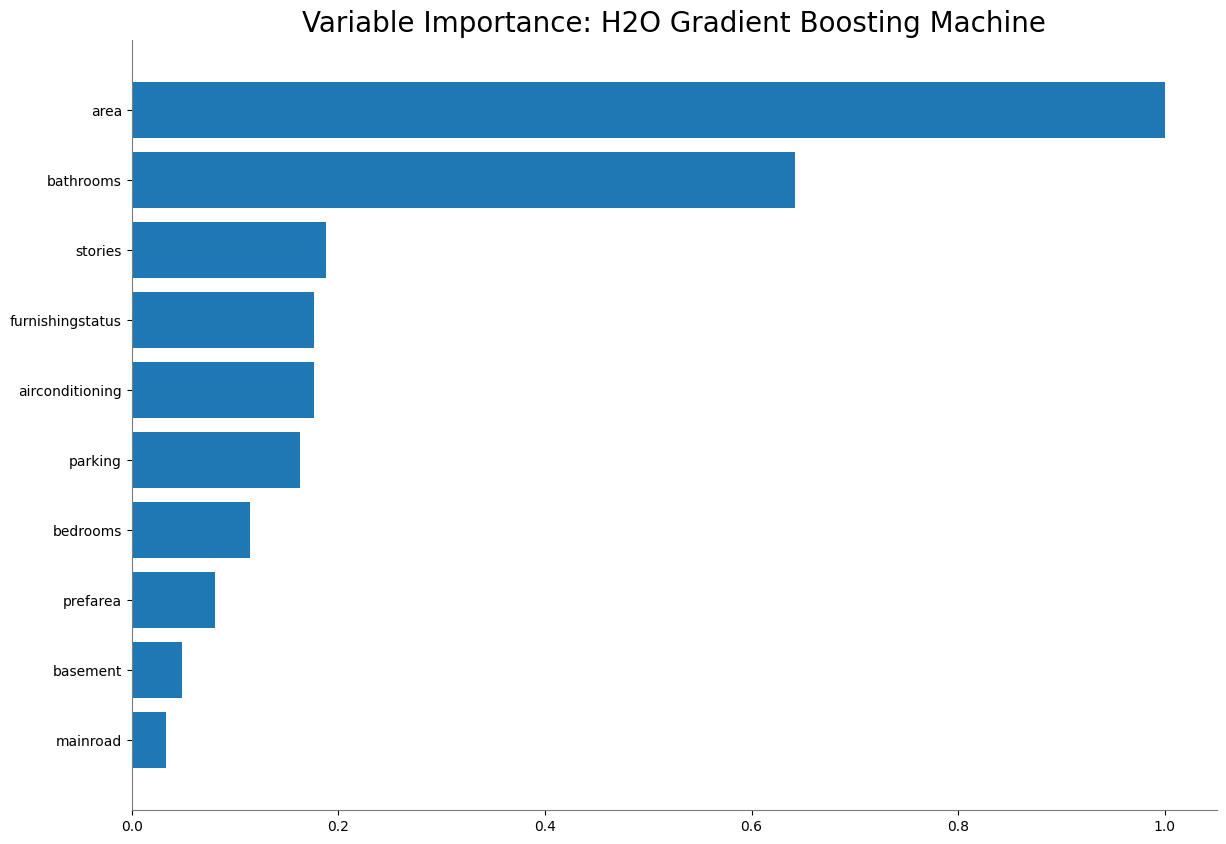

<Figure size 640x480 with 0 Axes>

In [143]:
%matplotlib inline
best_model.varimp_plot()

This analysis highlighted the importance of evaluating variable relationships, assessing model assumptions, addressing multicollinearity, selecting significant predictors, and tuning hyperparameters for reliable and efficient predictive modeling.

## **Assignment 3**

The task at hand involves interpreting predictive models constructed from a given dataset using various techniques. Firstly, regression coefficients of a linear model are analyzed to discern the impact of predictor variables on the target variable, providing insights into their individual contributions. Secondly, the nodes of a tree-based model are examined to understand the decision-making process of the model, offering clarity on how it partitions the feature space. Next, AutoML is employed to identify the best-performing model on the dataset, streamlining the model selection process. Finally, SHAP (SHapley Additive exPlanations) analysis is conducted on the models from the previous steps to interpret SHAP values, offering a nuanced understanding of feature importance and model predictions. By employing these interpretability methods, a comprehensive understanding of the models' behavior and predictive mechanisms is obtained, facilitating informed decision-making and model refinement.

In [145]:
data = pd.read_csv("https://raw.githubusercontent.com/riyaneu/Housing-Prices-Prediction/main/Housing.csv")

In [146]:
numeric_cols=[]
cat_cols=[]
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [147]:
#separate numeric and categorical columns
print(numeric_cols)
print(cat_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [148]:
#encode the categorical values using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [149]:
for col in cat_cols:
    data[col]=le.fit_transform(data[col])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [150]:
# Splitting target and predictor variables.
X = data.drop('price', axis=1)
y = data['price']

In [151]:
print(f"Mean value: {round(y.mean(), 2)}")

Mean value: 4766729.25


In [152]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

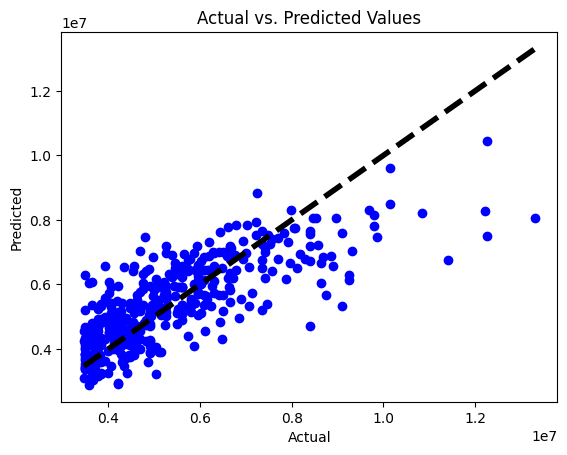

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

import matplotlib.pyplot as plt

# Get predicted values
predicted_values = model.predict(X_train)

# Plot actual vs. predicted values
plt.scatter(y_train, predicted_values, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 1055066827105.21
Coefficient of determination: -4.21
R^2 score on test set = -4.213093437074803


In [158]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              842.6
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   2.75e-273
Time:                        03:07:35   Log-Likelihood:                         -6255.2
No. Observations:                 408   AIC:                                  1.253e+04
Df Residuals:                     396   BIC:                                  1.258e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area               218.6117     26.842      8.144      0.000     165.842     271.382
bedrooms          1.752e+05   7.36e+04      2.381      0.018    3.05e+04     3.2e+05
bathrooms          9.41e+05   1.14e+05      8.230      0.000    7.16e+05    1.17e+06
stories           4.606e+05    7.2e+04      6.395      0.000    3.19e+05    6.02e+05
mainroad           6.53e+05    1.8e+05      3.629      0.000    2.99e+05    1.01e+06
guestroom         2.549e+05   1.46e+05      1.742      0.082   -3.27e+04    5.43e+05
basement          3.895e+05    1.3e+05      3.001      0.003    1.34e+05    6.45e+05
hotwaterheating   8.458e+05   2.51e+05      3.369      0.001    3.52e+05    1.34e+06
airconditioning    7.71e+05   1.23e+05      6.287      0.000     5.3e+05    1.01e+06
parking           2.688e+05   6.68e+04      4.021      0.000    1.37e+05       4e+05
prefarea          5.361e+05   1.28e+05      4.196      0.000    2.85e+05    7.87e+05
furnishingstatus -8.393e+04   7.54e+04     -1.113      0.267   -2.32e+05    6.44e+04
==============================================================================
Omnibus:                       83.319   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.596
Skew:                           0.988   Prob(JB):                     9.26e-48
Kurtosis:                       5.973   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
shap.initjs()

In [160]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 138it [00:11,  4.35it/s]                         


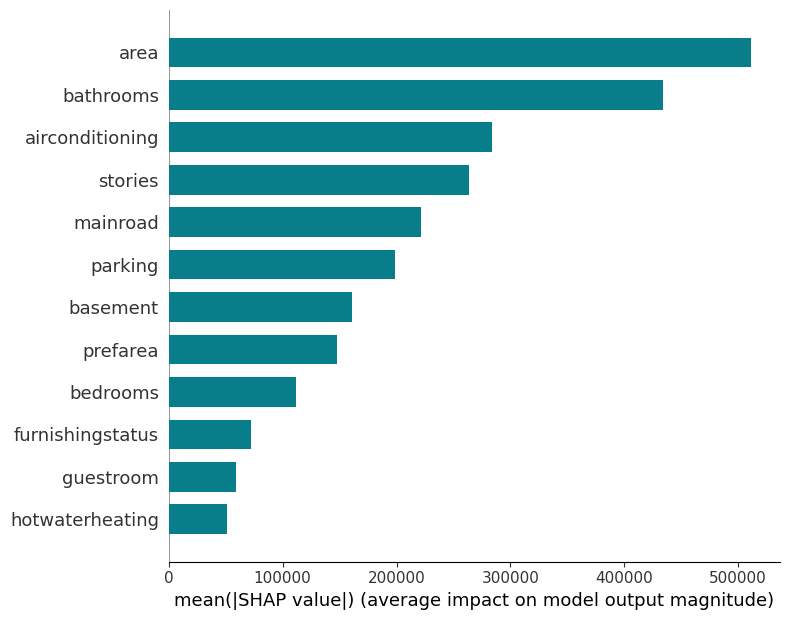

In [161]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#087E8B')

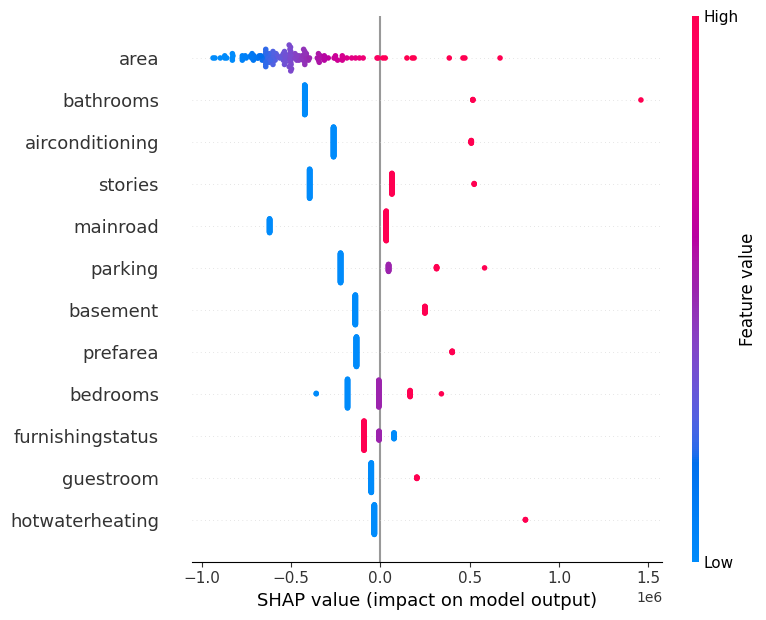

In [162]:
shap.summary_plot(shap_values, X_test)

**Random Forest**

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
from sklearn.tree import _tree

def print_tree_nodes(tree, feature_names, node_id=0, depth=0):
    indent = "  " * depth
    if tree.children_left[node_id] == _tree.TREE_LEAF:
        print(indent + f"Leaf: Class={np.argmax(tree.value[node_id])}")
    else:
        feature = feature_names[tree.feature[node_id]]
        threshold = tree.threshold[node_id]
        print(indent + f"Node: Feature='{feature}' Threshold={threshold}")
        print_tree_nodes(tree, feature_names, tree.children_left[node_id], depth + 1)
        print_tree_nodes(tree, feature_names, tree.children_right[node_id], depth + 1)

# Assuming model_tree is already trained RandomForestClassifier

# Extract the first decision tree from the random forest
estimator = model_tree.estimators_[0]

# Print the nodes of the decision tree
print_tree_nodes(estimator.tree_, X_train.columns)


Node: Feature='guestroom' Threshold=0.5
  Node: Feature='stories' Threshold=3.5
    Node: Feature='bedrooms' Threshold=2.5
      Node: Feature='parking' Threshold=2.5
        Node: Feature='bathrooms' Threshold=1.5
          Node: Feature='parking' Threshold=0.5
            Node: Feature='prefarea' Threshold=0.5
              Node: Feature='mainroad' Threshold=0.5
                Leaf: Class=4
                Node: Feature='stories' Threshold=1.5
                  Node: Feature='airconditioning' Threshold=0.5
                    Node: Feature='area' Threshold=3831.0
                      Node: Feature='furnishingstatus' Threshold=0.5
                        Leaf: Class=8
                        Leaf: Class=13
                      Node: Feature='area' Threshold=4975.0
                        Node: Feature='furnishingstatus' Threshold=1.5
                          Node: Feature='area' Threshold=4290.0
                            Node: Feature='basement' Threshold=0.5
                   

In [168]:
# Make predictions using the testing set
y_pred = model_tree.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 1492654472226.28
Coefficient of determination: -6.38
R^2 score on test set = -6.375217410950992


In [169]:
explainer = shap.Explainer(model_tree.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 138it [05:47,  2.58s/it]


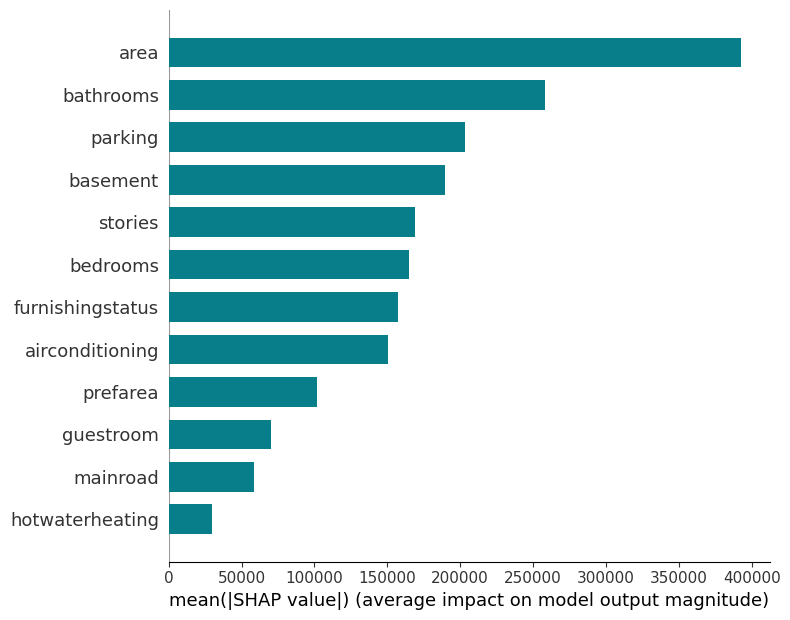

In [171]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#087E8B')

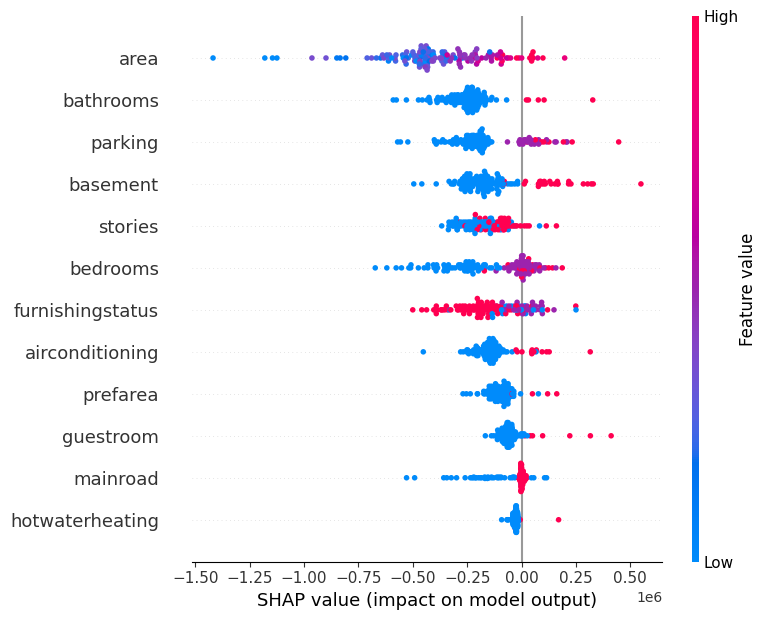

In [172]:
shap.summary_plot(shap_values, X_test)

AutoML Best Model and SHAP analysis

In [173]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1245148219290.495
RMSE: 1115862.0968966081
MAE: 828656.3196592308
RMSLE: 0.21761496322713378
Mean Residual Deviance: 1245148219290.495

In [174]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

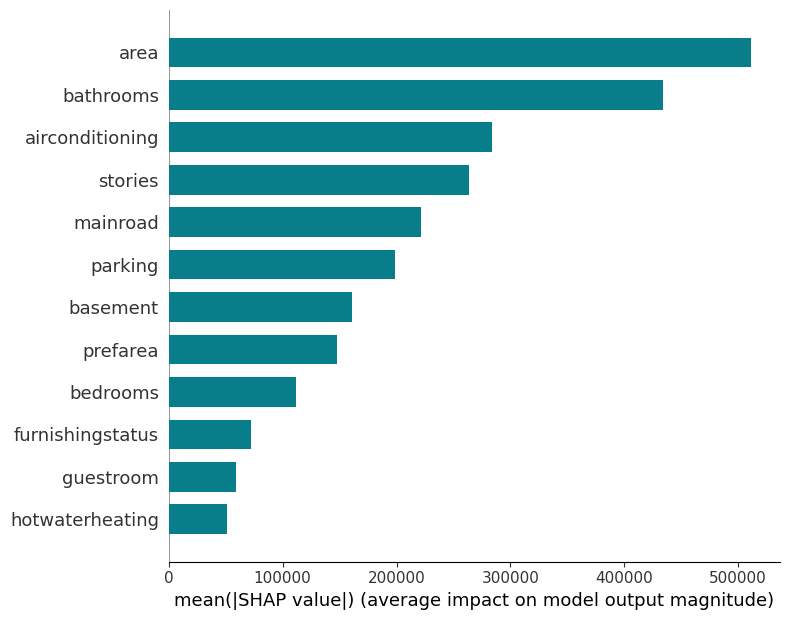

In [175]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#087E8B')

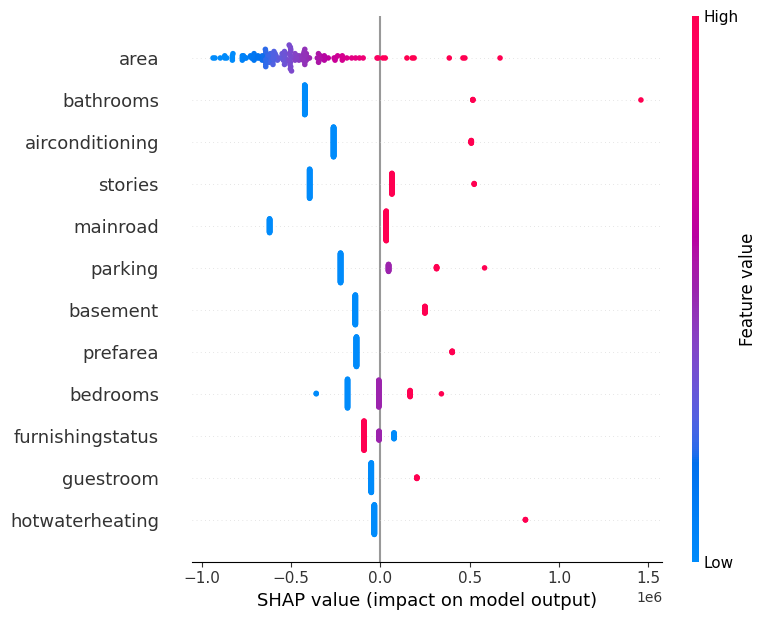

In [176]:
shap.summary_plot(shap_values, X_test)

Through this analysis, I gained insights into various model interpretation techniques, such as regression coefficients, tree nodes, AutoML, and SHAP analysis. I learned the importance of understanding how different models make predictions and the strengths and limitations of each interpretability method. Additionally, I gained insights into how SHAP analysis can enhance model interpretability by providing insights into individual predictions and feature importance.

References:
Github link: https://github.com/riyaneu/Housing-Prices-Prediction

MIT License

Copyright (c) 2024 riyaneu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.